In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Add Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_df = pd.read_csv(city_data)
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a pandas DataFrame
ride_df = pd.read_csv(ride_data)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12
5,South Latoya,2019-03-11 12:26,9.52,1.994999e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932084e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119539e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995623e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327642e+12


In [5]:
# 1. Inspecting the city dataframe

# Get the columns and the rows that are not null
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# Double check there are no null values
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# Get the unique values of the type of city
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# Get the number of data points from the Urban cities
sum(city_df["type"] == "Urban")

66

In [12]:
# Get the number of data points from the Suburban cities
sum(city_df["type"] == "Suburban")

36

In [13]:
# Get the number of data points from the Rural cities
sum(city_df["type"] == "Rural")

18

In [14]:
# 2. Inspecting the ride dataframe

# Get the columns and rows that are not null
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Double check there are no null values
ride_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Get the data types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [17]:
# 3. Merge the 2 dataframes into 1

# Combine the data into a single dataset
pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])

# Display new dataframe
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12,46,Urban


In [18]:
# 4. Create DataFrames for each type of city

# Create the Urban city DataFrame
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739411e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343912e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005066e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149245e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908451e+12,46,Urban


In [20]:
# Create the Suburban city DataFrames
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.653623e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.575961e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.669117e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.706771e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.273047e+12,12,Suburban


In [21]:
# Create the Rural city DataFrames
rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.985256e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.421837e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.269653e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.018025e+12,2,Rural


In [22]:
# 5. Get the number of rides for each city type

# Get the number of rides for urban cities
urban_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
# Get the number of rides for suburban cities
suburban_count = suburban_df.groupby(["city"]).count()["ride_id"]
suburban_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [24]:
# Get the number of rides for rural cities
rural_count = rural_df.groupby(["city"]).count()["ride_id"]
rural_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [26]:
# 6. Get the average fare for each city type

# Get the average fare for each city in urban cities
urban_fare_avg = urban_df.groupby(["city"]).mean()["fare"]
urban_fare_avg.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [28]:
# Get the average fare for each city in suburban cities
suburban_fare_avg = suburban_df.groupby(["city"]).mean()["fare"]
suburban_fare_avg.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [30]:
# Get the average fare for each city in rural cities
rural_fare_avg = rural_df.groupby(["city"]).mean()["fare"]
rural_fare_avg.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [31]:
# 7. Get the average number of drivers for each city type

# Get the average number of drivers for each urban city
urban_driver_avg = urban_df.groupby(["city"]).mean()["driver_count"]
urban_driver_avg.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [33]:
# Get the average number of drivers for each suburban city
suburban_driver_avg = suburban_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_avg.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
# Get the average number of drivers for each rural city
rural_driver_avg = rural_df.groupby(["city"]).mean()["driver_count"]
rural_driver_avg.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

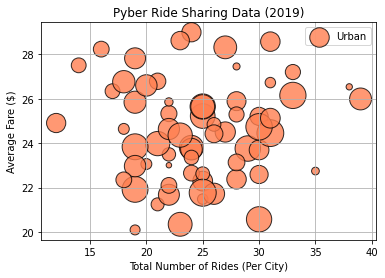

In [38]:
# 8. Create bubble charts for each type of city

# Create urban cities bubble chart
plt.scatter(urban_count, 
            urban_fare_avg,
            s=10*urban_driver_avg,
            color="coral",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Urban")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

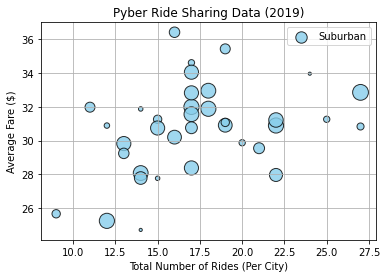

In [41]:
# Create suburban cities bubble chart
plt.scatter(suburban_count,
            suburban_fare_avg,
            s=10*suburban_driver_avg,
            color="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

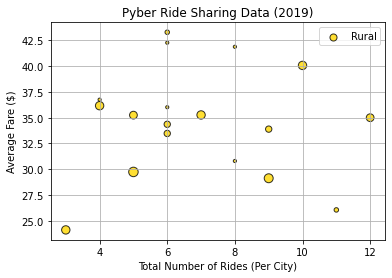

In [43]:
# Create rural cities bubble chart
plt.scatter(rural_count,
            rural_fare_avg,
            s=10*rural_driver_avg,
            color="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")
plt.title("Pyber Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Add the legend
plt.legend()

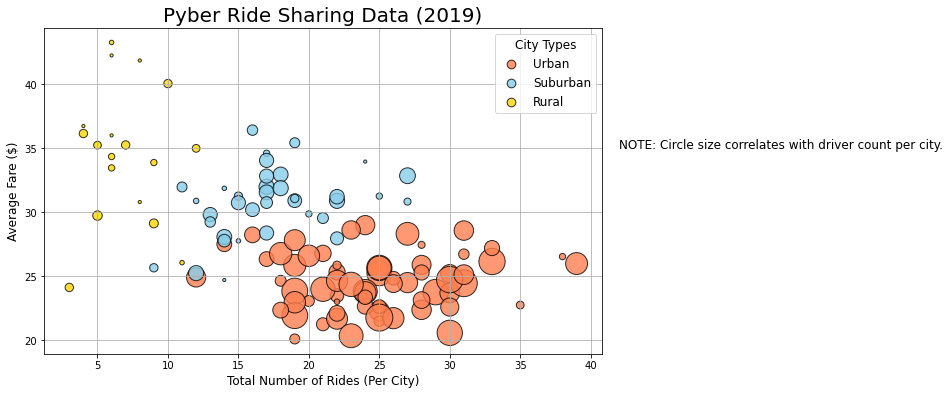

In [53]:
# 9. Combine each separate chart into 1 (combine the 3 scatter plot code blocks into 1 cell)

# Enlarge figure so that markers are spread out
plt.subplots(figsize=(10,6))

# Build out the combined scatter plot
plt.scatter(urban_count, 
            urban_fare_avg,
            s=10*urban_driver_avg,
            color="coral",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Urban")

plt.scatter(suburban_count,
            suburban_fare_avg,
            s=10*suburban_driver_avg,
            color="skyblue",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Suburban")

plt.scatter(rural_count,
            rural_fare_avg,
            s=10*rural_driver_avg,
            color="gold",
            edgecolor="black",
            linewidth=1,
            alpha=0.8,
            label="Rural")

# Incorporate all other graph properties + format font size
plt.title("Pyber Ride Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Add the legend - add variable and legendHandles to set font size of the markers in the legend to a fixed size
lgnd = plt.legend(fontsize=12, mode="Expanded",
                  scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text labal about circle size using plt.text(). 
# NOTE: numbers within brackets denote x and y coordinates where note will appear
plt.text(42, 35, "NOTE: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show the plot
plt.show()